<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Метрика-качества" data-toc-modified-id="Метрика-качества-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Метрика качества</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Описание проекта

Данные находятся в трёх файлах:

* gold_recovery_train_new.csv — обучающая выборка;
* gold_recovery_test_new.csv — тестовая выборка;
* gold_recovery_full_new.csv — исходные данные.

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

В вашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверьте по нашей инструкции их на корректность.

### Метрика качества

Для решения задачи введём новую метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).

Метрика sMAPE вычисляется так:


![sMAPE](https://pictures.s3.yandex.net/resources/smape_1576239058.jpg)

Нужно спрогнозировать сразу две величины:

* эффективность обогащения чернового концентрата rougher.output.recovery;
* эффективность обогащения финального концентрата final.output.recovery.

Итоговая метрика складывается из двух величин:

![Итоговое sMAPE](https://pictures.s3.yandex.net/resources/_smape_1576239054.jpg)

Загрузка необходимых библиотек.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
warnings.filterwarnings('ignore')

Подключение датафреймов к проекту.

In [ ]:
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [ ]:
gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [ ]:
gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Изучение уникальных значений и количества пропусков в процентах.

In [ ]:
def show_rows(data_frame):
    for column in data_frame.columns:
        print('Уникальные значения столбца', column)
        print(data_frame[column].unique())
    print('Количество пропусков в каждом столбце')    
    print(data_frame.isna().mean())

In [ ]:
show_rows(gold_recovery_train)

Уникальные значения столбца date
['2016-01-15 00:00:00' '2016-01-15 01:00:00' '2016-01-15 02:00:00' ...
 '2018-08-18 08:59:59' '2018-08-18 09:59:59' '2018-08-18 10:59:59']
Уникальные значения столбца final.output.concentrate_ag
[6.05540276 6.02936857 6.05592607 ... 3.10999751 3.36724104 3.59837494]
Уникальные значения столбца final.output.concentrate_pb
[ 9.88964844  9.9689441  10.21399457 ... 11.43436599 11.62558728
 11.7378318 ]
Уникальные значения столбца final.output.concentrate_sol
[5.50732422 5.25778148 5.38375877 ... 6.88601311 6.79943261 6.71750947]
Уникальные значения столбца final.output.concentrate_au
[42.19202042 42.70162925 42.65750061 ... 46.79569097 46.40818768
 46.29943814]
Уникальные значения столбца final.output.recovery
[70.54121591 69.26619763 68.11644507 ... 67.00218885 65.52324622
 70.28145415]
Уникальные значения столбца final.output.tail_ag
[10.41196156 10.46267568 10.50704594 ...  8.52960609  8.77717133
  8.40668973]
Уникальные значения столбца final.output.tai

In [ ]:
show_rows(gold_recovery_test)

Уникальные значения столбца date
['2016-09-01 00:59:59' '2016-09-01 01:59:59' '2016-09-01 02:59:59' ...
 '2017-12-31 21:59:59' '2017-12-31 22:59:59' '2017-12-31 23:59:59']
Уникальные значения столбца primary_cleaner.input.sulfate
[210.800909   215.39245478 215.25994647 ... 171.13571781 179.6971576
 181.55685577]
Уникальные значения столбца primary_cleaner.input.depressant
[14.99311769 14.9874713  12.8849338  ... 15.99366947 15.43897911
 14.99584972]
Уникальные значения столбца primary_cleaner.input.feed_size
[8.07999992 7.78666669 7.63999987 ... 7.88999927 7.57333384 7.96666576]
Уникальные значения столбца primary_cleaner.input.xanthate
[1.00502133 0.99046929 0.99604317 ... 1.16599581 1.50106793 1.62345438]
Уникальные значения столбца primary_cleaner.state.floatbank8_a_air
[1398.98130127 1398.77791158 1398.49366613 ... 1498.83618207 1498.46624268
 1498.09630329]
Уникальные значения столбца primary_cleaner.state.floatbank8_a_level
[-500.22557739 -500.05743464 -500.86835986 ... -501.7704

In [ ]:
show_rows(gold_recovery_full)

Уникальные значения столбца date
['2016-01-15 00:00:00' '2016-01-15 01:00:00' '2016-01-15 02:00:00' ...
 '2018-08-18 08:59:59' '2018-08-18 09:59:59' '2018-08-18 10:59:59']
Уникальные значения столбца final.output.concentrate_ag
[6.05540276 6.02936857 6.05592607 ... 3.10999751 3.36724104 3.59837494]
Уникальные значения столбца final.output.concentrate_pb
[ 9.88964844  9.9689441  10.21399457 ... 11.43436599 11.62558728
 11.7378318 ]
Уникальные значения столбца final.output.concentrate_sol
[5.50732422 5.25778148 5.38375877 ... 6.88601311 6.79943261 6.71750947]
Уникальные значения столбца final.output.concentrate_au
[42.19202042 42.70162925 42.65750061 ... 46.79569097 46.40818768
 46.29943814]
Уникальные значения столбца final.output.recovery
[70.54121591 69.26619763 68.11644507 ... 67.00218885 65.52324622
 70.28145415]
Уникальные значения столбца final.output.tail_ag
[10.41196156 10.46267568 10.50704594 ...  8.52960609  8.77717133
  8.40668973]
Уникальные значения столбца final.output.tai

Рассчет эффективности обогащения чернового концентрата rougher.output.recovery из обучающей выборки. Предварительно удалим пропуски из столбцов со значением NaN.

In [ ]:
gold_recovery_train.dropna(subset=['rougher.output.concentrate_au', 'rougher.input.feed_au',
                                   'rougher.output.tail_au','rougher.output.recovery'], inplace=True)
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [ ]:
concentrate_au_column = gold_recovery_train['rougher.output.concentrate_au']
feed_au_column = gold_recovery_train['rougher.input.feed_au']
tail_au_column = gold_recovery_train['rougher.output.tail_au']
input_recovery = gold_recovery_train['rougher.output.recovery']
calculated_recovery = concentrate_au_column * (feed_au_column - tail_au_column) / feed_au_column / (concentrate_au_column - tail_au_column) * 100
print('Абсолютная средняя ошибка =', mean_absolute_error(input_recovery, calculated_recovery))

Абсолютная средняя ошибка = 1.0748911125799084e-14


MAE имеет очень малое отклонение — это значит, что расчетное значение rougher.output.recovery совпадает с данными из столбца.

Выполняю чистку от пропущенных значений в обучающей и тестовой выборке.

In [ ]:
good_gold_recovery_train = gold_recovery_train.dropna()
good_gold_recovery_train.isna().mean()

date                                          0.0
final.output.concentrate_ag                   0.0
final.output.concentrate_pb                   0.0
final.output.concentrate_sol                  0.0
final.output.concentrate_au                   0.0
                                             ... 
secondary_cleaner.state.floatbank5_a_level    0.0
secondary_cleaner.state.floatbank5_b_air      0.0
secondary_cleaner.state.floatbank5_b_level    0.0
secondary_cleaner.state.floatbank6_a_air      0.0
secondary_cleaner.state.floatbank6_a_level    0.0
Length: 87, dtype: float64

In [ ]:
good_gold_recovery_test = gold_recovery_test.dropna()
good_gold_recovery_test.isna().mean()

date                                          0.0
primary_cleaner.input.sulfate                 0.0
primary_cleaner.input.depressant              0.0
primary_cleaner.input.feed_size               0.0
primary_cleaner.input.xanthate                0.0
primary_cleaner.state.floatbank8_a_air        0.0
primary_cleaner.state.floatbank8_a_level      0.0
primary_cleaner.state.floatbank8_b_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_c_level      0.0
primary_cleaner.state.floatbank8_d_air        0.0
primary_cleaner.state.floatbank8_d_level      0.0
rougher.input.feed_ag                         0.0
rougher.input.feed_pb                         0.0
rougher.input.feed_rate                       0.0
rougher.input.feed_size                       0.0
rougher.input.feed_sol                        0.0
rougher.input.feed_au                         0.0
rougher.input.floatbank10_sulfate             0.0


В тестовой выборке отсуствуют столбцы этапов rougher.output, rougher.calculation, final.output, primary_cleaner.output и secondary_cleaner.output. 
Эти данные будут получены по результатам технологического процесса. Это онлайн метрики. Остальные столбцы исторически известны — значит это офлайн метрики.

Выделяю столбцы из тестовой выборки, по которым будет обучаться модель. Столбец data не несет смысла для обучающей модели. Для предсказания rougher.output.recovery будут использоватся данные из стобцов этапа rougher. Для вычисления final.output.recovery будут использованы все столбцы из тестовой выборки.

In [ ]:
features_columns = good_gold_recovery_test.columns[1:]
rougher_features_columns = set(features_columns[12:34])
final_features_columns = set(features_columns)
print(rougher_features_columns)
print()
print(final_features_columns)

{'rougher.input.feed_au', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_e_air', 'rougher.input.feed_pb', 'rougher.state.floatbank10_d_level', 'rougher.input.feed_sol', 'rougher.state.floatbank10_f_level', 'rougher.state.floatbank10_d_air', 'rougher.input.feed_ag', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_e_level', 'rougher.input.feed_size', 'rougher.input.floatbank10_sulfate', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_b_air', 'rougher.input.feed_rate', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_a_level'}

{'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_au', 'rougher.input.floatbank11_sulfate', 'primary_cleaner.input.feed_size', 'primary_cleaner.input.depressant', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_d_air',

Пройду по ключевым столбцам в обучающей выборке.

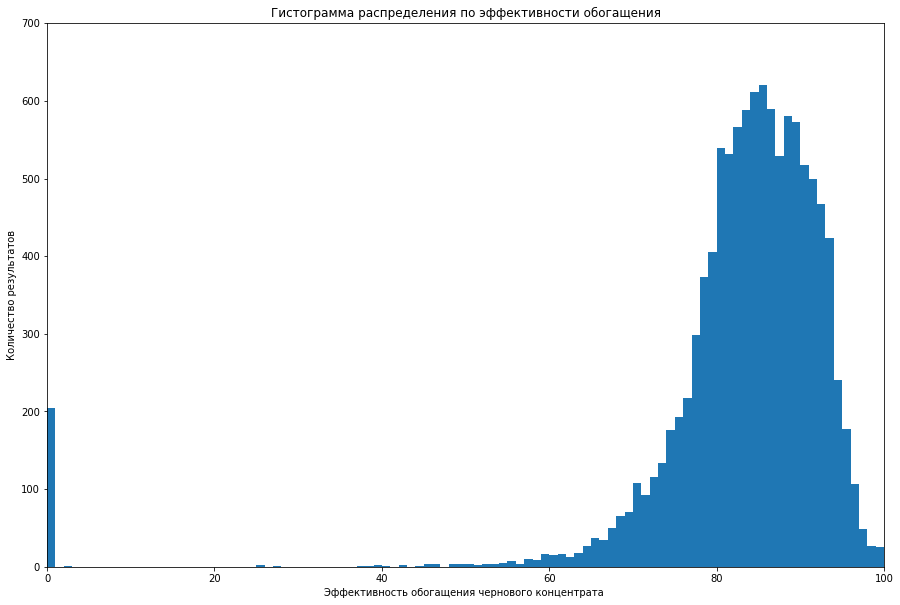

In [ ]:
plt.figure(figsize=[15,10])

plt.hist(good_gold_recovery_train['rougher.output.recovery'], bins=100)

plt.xlim([0, 100])
plt.ylim([0, 700])

plt.xlabel("Эффективность обогащения чернового концентрата ")
plt.ylabel("Количество результатов")

plt.title("Гистограмма распределения по эффективности обогащения")
plt.show()

Изучу нулевые значения в столбце rougher.output.recovery.

In [ ]:
good_gold_recovery_train[good_gold_recovery_train['rougher.output.recovery'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
45,2016-01-16 21:00:00,4.566664,10.406178,4.588698,46.614456,68.403877,10.705777,1.509070,17.875134,2.509776,...,14.025588,-550.404242,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228
46,2016-01-16 22:00:00,4.577832,10.691605,5.274175,46.250638,70.675633,10.728531,1.641216,18.349339,2.540843,...,14.094808,-550.676337,12.004728,-550.496522,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683
50,2016-01-17 03:00:00,5.759800,9.537415,3.997737,45.267942,68.638723,10.623064,1.217058,16.072705,2.471388,...,14.164342,-552.959690,11.917980,-549.417320,10.016315,-497.644975,7.999080,-500.112143,12.043030,-599.630112
51,2016-01-17 04:00:00,5.807253,10.439505,6.512951,43.237493,72.136712,10.518407,1.336890,17.750367,2.323883,...,14.097072,-549.292129,12.000525,-550.306171,9.925991,-501.985618,7.948277,-500.060988,12.005620,-601.746110
759,2016-02-18 20:00:00,8.478624,11.303437,10.547473,35.776254,80.041038,12.958362,2.369492,9.839622,3.066451,...,23.709602,-412.029336,22.639733,-412.896304,25.021629,-428.537556,21.011542,-400.287375,30.004867,-396.683519


In [ ]:
good_gold_recovery_train[good_gold_recovery_train['rougher.output.concentrate_au'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
45,2016-01-16 21:00:00,4.566664,10.406178,4.588698,46.614456,68.403877,10.705777,1.509070,17.875134,2.509776,...,14.025588,-550.404242,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228
46,2016-01-16 22:00:00,4.577832,10.691605,5.274175,46.250638,70.675633,10.728531,1.641216,18.349339,2.540843,...,14.094808,-550.676337,12.004728,-550.496522,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683
50,2016-01-17 03:00:00,5.759800,9.537415,3.997737,45.267942,68.638723,10.623064,1.217058,16.072705,2.471388,...,14.164342,-552.959690,11.917980,-549.417320,10.016315,-497.644975,7.999080,-500.112143,12.043030,-599.630112
51,2016-01-17 04:00:00,5.807253,10.439505,6.512951,43.237493,72.136712,10.518407,1.336890,17.750367,2.323883,...,14.097072,-549.292129,12.000525,-550.306171,9.925991,-501.985618,7.948277,-500.060988,12.005620,-601.746110
759,2016-02-18 20:00:00,8.478624,11.303437,10.547473,35.776254,80.041038,12.958362,2.369492,9.839622,3.066451,...,23.709602,-412.029336,22.639733,-412.896304,25.021629,-428.537556,21.011542,-400.287375,30.004867,-396.683519


В данных нет информации о этапе rougher. Удалю эти значения, так как они могут исказить данные.

In [ ]:
good_gold_recovery_train = good_gold_recovery_train.drop(good_gold_recovery_train[good_gold_recovery_train['rougher.output.recovery'] == 0].index)
good_gold_recovery_train[good_gold_recovery_train['rougher.output.recovery'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


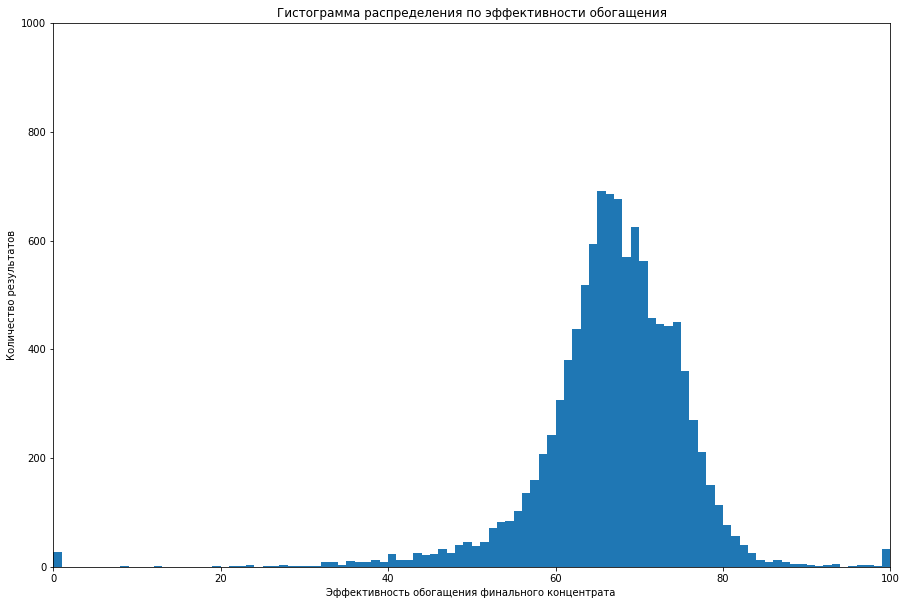

In [ ]:
plt.figure(figsize=[15,10])

plt.hist(good_gold_recovery_train['final.output.recovery'], bins=100)

plt.xlim([0, 100])
plt.ylim([0, 1000])

plt.xlabel("Эффективность обогащения финального концентрата ")
plt.ylabel("Количество результатов")

plt.title("Гистограмма распределения по эффективности обогащения")
plt.show()

In [ ]:
good_gold_recovery_train[good_gold_recovery_train['final.output.recovery'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
644,2016-02-13 11:00:00,0.0,0.0,0.0,0.0,0.0,8.894029,0.843584,15.417342,1.779052,...,21.991762,-399.587122,21.988937,-401.366408,22.995012,-399.370680,20.966863,-399.308354,24.987274,-399.619808
1193,2016-03-11 10:00:00,0.0,0.0,0.0,0.0,0.0,10.817313,1.462800,16.407607,2.984504,...,11.979352,-453.431061,12.003445,-450.179844,11.982937,-449.856468,9.927727,-450.521700,19.971682,-500.685521
1194,2016-03-11 11:00:00,0.0,0.0,0.0,0.0,0.0,10.436792,1.207636,17.800392,2.747294,...,12.034636,-446.590944,12.130405,-449.684812,11.844983,-450.881424,9.916784,-449.542871,20.004767,-500.137068
1195,2016-03-11 12:00:00,0.0,0.0,0.0,0.0,0.0,10.637073,1.405778,17.195897,2.791440,...,12.016716,-496.613149,12.055535,-496.908551,12.091144,-496.404140,9.976074,-496.783155,19.921634,-500.769011
1196,2016-03-11 13:00:00,0.0,0.0,0.0,0.0,0.0,10.530320,1.461550,17.556860,2.682127,...,11.993898,-500.427824,12.083824,-500.162537,12.078809,-499.903743,10.075259,-499.540325,20.039788,-499.932405


In [ ]:
good_gold_recovery_train = good_gold_recovery_train.drop(good_gold_recovery_train[good_gold_recovery_train['final.output.recovery'] == 0].index)
good_gold_recovery_train[good_gold_recovery_train['final.output.recovery'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


In [ ]:
good_gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10784 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                10784 non-null  object 
 1   final.output.concentrate_ag                         10784 non-null  float64
 2   final.output.concentrate_pb                         10784 non-null  float64
 3   final.output.concentrate_sol                        10784 non-null  float64
 4   final.output.concentrate_au                         10784 non-null  float64
 5   final.output.recovery                               10784 non-null  float64
 6   final.output.tail_ag                                10784 non-null  float64
 7   final.output.tail_pb                                10784 non-null  float64
 8   final.output.tail_sol                               10784 non-null  float64


Проверю есть ли нулевые значения в primary_cleaner.output и secondary_cleaner.output.

In [ ]:
good_gold_recovery_train[good_gold_recovery_train['primary_cleaner.output.concentrate_au'] < 1]['primary_cleaner.output.concentrate_au'].count()

109

In [ ]:
good_gold_recovery_train[good_gold_recovery_train['secondary_cleaner.output.tail_au'] < 1]['secondary_cleaner.output.tail_au'].count()

426

По данным этапам тоже присутвуют нулевые значения. 

Но так как они не являются целью модели и не входят в список столбцов обучающей модели, оставим их без изменения.

### Вывод

В данных присутвовали аномалии:

* Пропущенные значение
* Нулевые значения на ключевых этапах

Неподходящие данные были удалены. Возможно не были сняты данные по выбранным этапам или они еще не были получены в результате работы системы.

Данные готовы к дальнейшему анализу.

## Анализ данных

Рассмотрю концентрацию веществ на каждом этапе.

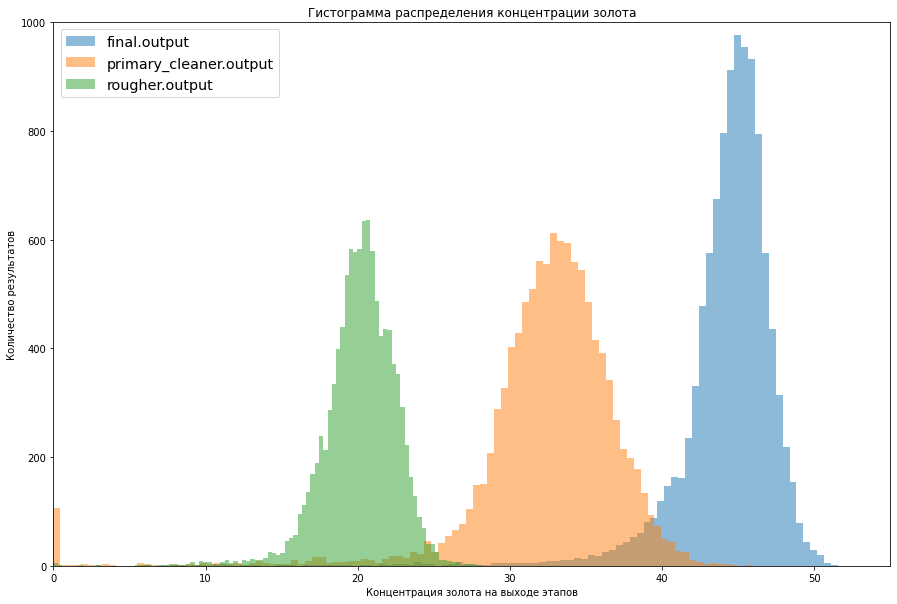

In [ ]:
plt.figure(figsize=[15,10])

plt.hist(good_gold_recovery_train['final.output.concentrate_au'], bins=100, label = 'final.output', alpha=.5)
plt.hist(good_gold_recovery_train['primary_cleaner.output.concentrate_au'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(good_gold_recovery_train['rougher.output.concentrate_au'], bins=100, label = 'rougher.output', alpha=.5)

plt.xlim([0, 55])
plt.ylim([0, 1000])

plt.xlabel("Концентрация золота на выходе этапов")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации золота")
plt.show()

Концентрация золота повышается с каждым этапом. 

Цель флотации и очисток увеличить концентрацию золота.

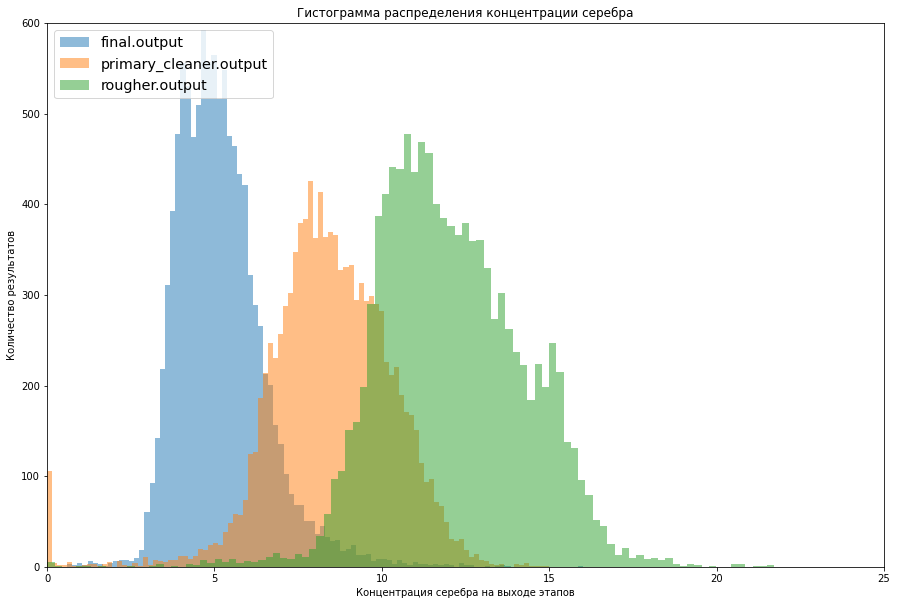

In [ ]:
plt.figure(figsize=[15,10])

plt.hist(good_gold_recovery_train['final.output.concentrate_ag'], bins=100, label = 'final.output', alpha=.5)
plt.hist(good_gold_recovery_train['primary_cleaner.output.concentrate_ag'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(good_gold_recovery_train['rougher.output.concentrate_ag'], bins=100, label = 'rougher.output', alpha=.5)

plt.xlim([0, 25])
plt.ylim([0, 600])

plt.xlabel("Концентрация серебра на выходе этапов")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации серебра")
plt.show()

Конецентрация серебра понижается с каждым шагом очистки. 

Так как основным благородным металом является золото, то остальные металлы и соединения должны быть отфильтрованы.

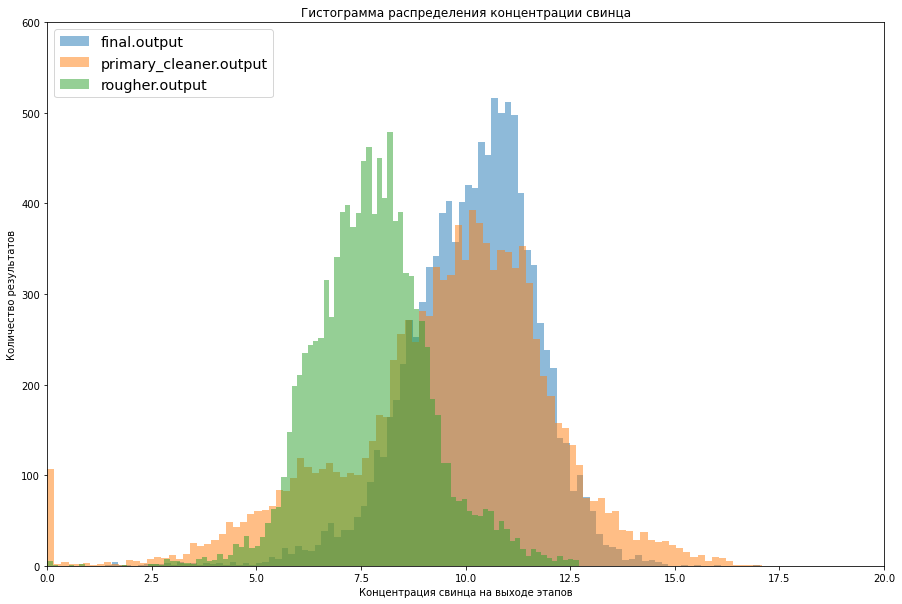

In [ ]:
plt.figure(figsize=[15,10])

plt.hist(good_gold_recovery_train['final.output.concentrate_pb'], bins=100, label = 'final.output', alpha=.5)
plt.hist(good_gold_recovery_train['primary_cleaner.output.concentrate_pb'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(good_gold_recovery_train['rougher.output.concentrate_pb'], bins=100, label = 'rougher.output', alpha=.5)

plt.xlim([0, 20])
plt.ylim([0, 600])

plt.xlabel("Концентрация свинца на выходе этапов")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации свинца")
plt.show()

Концентрация свинца повышается с этапа rougher до primary_cleaner. И потом усредняется. Это связано с химическим процесами очищения золота. При использование азотнокислого выщелачивания в концентрате образуется много сульфата свинца. Повышение концентрации свинца в целом происходит не только из-за этого процесса, но из-за очищения других составляющих из золотоносной руды.

Изучим размеры сырья на этапах обработки.

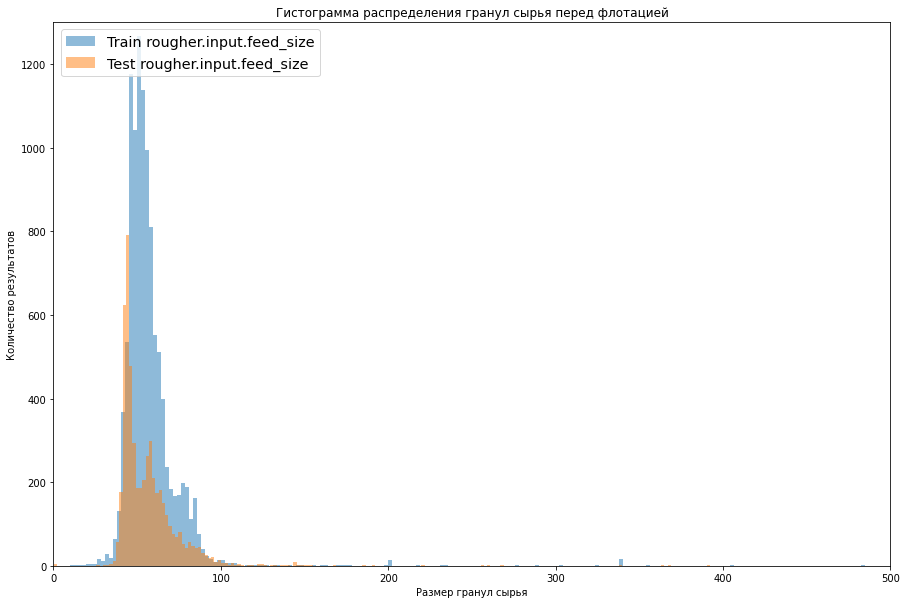

In [ ]:
plt.figure(figsize=[15,10])

plt.hist(good_gold_recovery_train['rougher.input.feed_size'], bins=200, label = 'Train rougher.input.feed_size', alpha=.5)
plt.hist(good_gold_recovery_test['rougher.input.feed_size'], bins=200, label = 'Test rougher.input.feed_size', alpha=.5)

plt.xlim([0, 500])
plt.ylim([0, 1300])

plt.xlabel("Размер гранул сырья")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения гранул сырья перед флотацией")
plt.show()

Распределение гранул до флотации похоже на нормальное со смещением влево как в обучающей, так и в тестовой выбрке. 

Существует много выбросов после размера гранул 100.

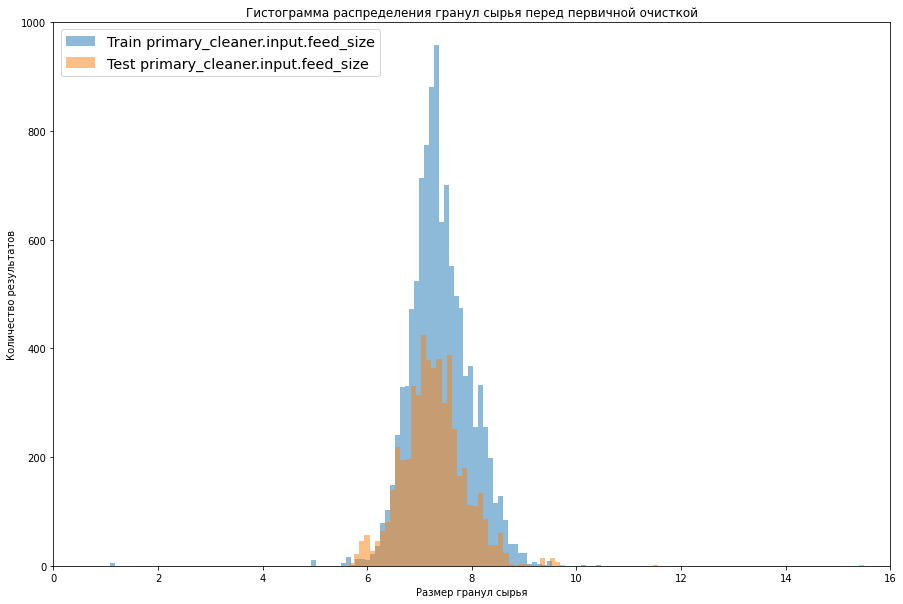

In [ ]:
plt.figure(figsize=[15,10])

plt.hist(good_gold_recovery_train['primary_cleaner.input.feed_size'], bins=100, label = 'Train primary_cleaner.input.feed_size', alpha=.5)
plt.hist(good_gold_recovery_test['primary_cleaner.input.feed_size'], bins=100, label = 'Test primary_cleaner.input.feed_size', alpha=.5)

plt.xlim([0, 16])
plt.ylim([0, 1000])

plt.xlabel("Размер гранул сырья")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения гранул сырья перед первичной очисткой")
plt.show()

Размеры гранул перед первичной очисткой обладают нормальным распределением.

Подготовим столбцы с финальными концентрациями в обучающей выборке.

In [ ]:
final_output_concentrate_sum_train = (good_gold_recovery_train['final.output.concentrate_au'] + 
                                      good_gold_recovery_train['final.output.concentrate_ag'] + 
                                      good_gold_recovery_train['final.output.concentrate_pb'] +
                                      good_gold_recovery_train['final.output.concentrate_sol'])
primary_cleaner_output_concentrate_sum_train = (good_gold_recovery_train['primary_cleaner.output.concentrate_au'] + 
                                                good_gold_recovery_train['primary_cleaner.output.concentrate_ag'] + 
                                                good_gold_recovery_train['primary_cleaner.output.concentrate_pb'] +
                                                good_gold_recovery_train['primary_cleaner.output.concentrate_sol'])
rougher_output_concentrate_sum_train = (good_gold_recovery_train['rougher.output.concentrate_au'] + 
                                        good_gold_recovery_train['rougher.output.concentrate_ag'] + 
                                        good_gold_recovery_train['rougher.output.concentrate_pb'] +
                                        good_gold_recovery_train['rougher.output.concentrate_sol'])

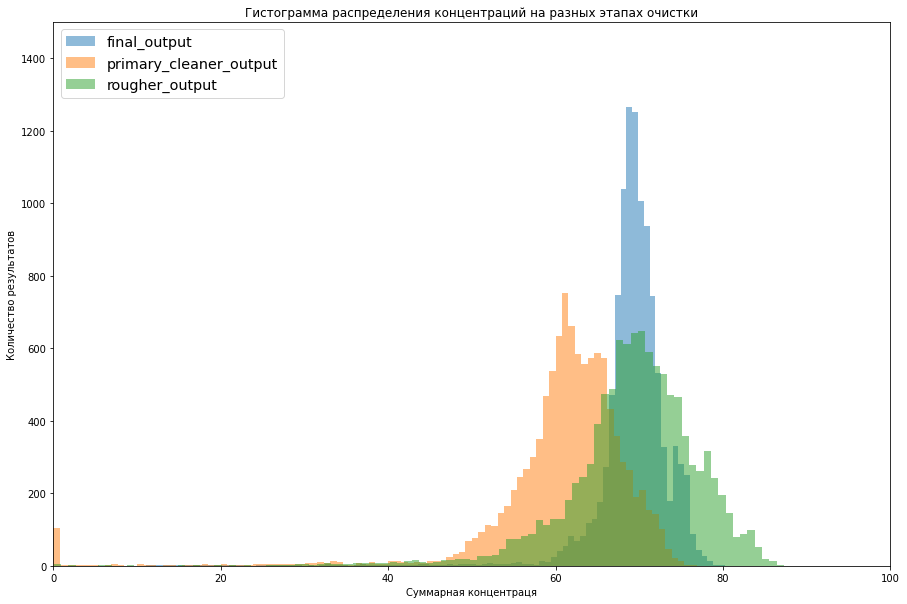

In [ ]:
plt.figure(figsize=[15,10])

plt.hist(final_output_concentrate_sum_train, bins=100, label = 'final_output', alpha=.5)
plt.hist(primary_cleaner_output_concentrate_sum_train, bins=100, label = 'primary_cleaner_output', alpha=.5)
plt.hist(rougher_output_concentrate_sum_train, bins=100, label = 'rougher_output', alpha=.5)

plt.xlim([0, 100])
plt.ylim([0, 1500])

plt.xlabel("Суммарная концентраця")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентраций на разных этапах очистки")
plt.show()

По графику видно, что из аномалий много значений в 0. 

Приближаю график.

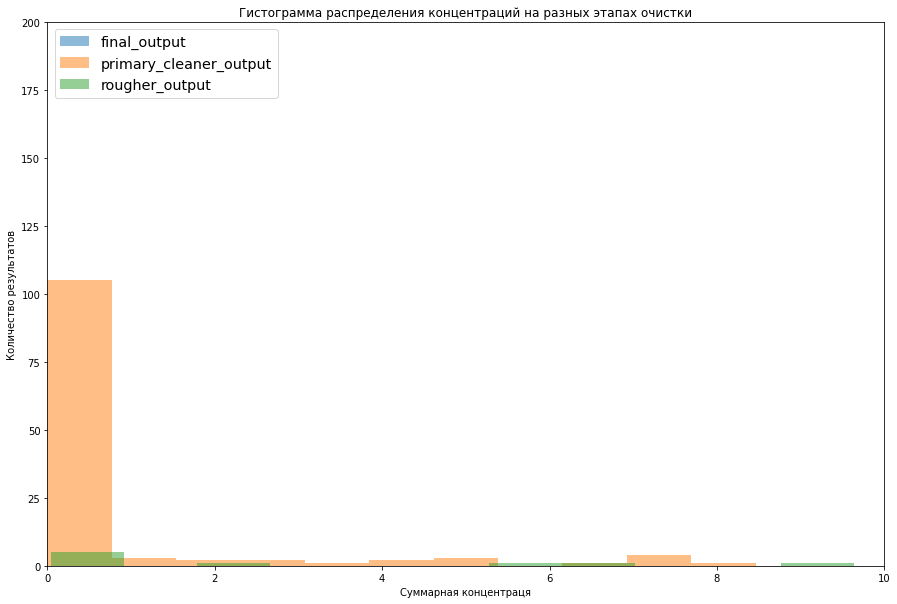

In [ ]:
plt.figure(figsize=[15,10])

plt.hist(final_output_concentrate_sum_train, bins=100, label = 'final_output', alpha=.5)
plt.hist(primary_cleaner_output_concentrate_sum_train, bins=100, label = 'primary_cleaner_output', alpha=.5)
plt.hist(rougher_output_concentrate_sum_train, bins=100, label = 'rougher_output', alpha=.5)

plt.xlim([0, 10])
plt.ylim([0, 200])

plt.xlabel("Суммарная концентраця")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентраций на разных этапах очистки")
plt.show()

На этапе предобрабоки были найдены строки с нулевыми значениями в primary_cleaner.output. 

Эти же строки показывают суммарную концентрацию, равную 0. 

Соответственно они являются аномалией. Удалим их.

In [ ]:
good_gold_recovery_train = good_gold_recovery_train.drop(good_gold_recovery_train[good_gold_recovery_train['primary_cleaner.output.concentrate_au'] == 0].index)
good_gold_recovery_train[good_gold_recovery_train['primary_cleaner.output.concentrate_au'] == 0].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


### Вывод

В результате анализа были изучены:

* Концетрации основных веществ на разных этапах очистки.
* Размер гранул тестовой и обучающей выборки.
* Суммарная концентрация веществ.

Аномалии были удалены. Данные готовы к обучению

## Модель

Создаю разделение признаков для предсказания rougher.output.recovery и final.output.recovery.

In [ ]:
# Подготовка признаков для final.output.recovery
columns_to_delete = set(good_gold_recovery_train.columns) - final_features_columns
print(columns_to_delete)
train_features_final = good_gold_recovery_train.drop(columns_to_delete, axis=1)
print()
print(train_features_final.columns)
# Проверка вхождения всех столбцов из feateures в столбцах тестовой выборки
print(set(train_features_final.columns) - set(gold_recovery_test.columns))

# Подготовка признаков для rougher.output.recovery
columns_to_delete = set(train_features_final.columns) - rougher_features_columns
print(columns_to_delete)
train_features_rougher = train_features_final.drop(columns_to_delete, axis=1)
print()
print(train_features_rougher.columns)

{'secondary_cleaner.output.tail_au', 'final.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.output.concentrate_pb', 'rougher.output.tail_ag', 'primary_cleaner.output.concentrate_ag', 'rougher.output.tail_au', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'final.output.concentrate_sol', 'final.output.concentrate_pb', 'final.output.tail_sol', 'rougher.output.concentrate_sol', 'rougher.calculation.au_pb_ratio', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_au', 'rougher.output.concentrate_au', 'secondary_cleaner.output.tail_sol', 'final.output.tail_ag', 'rougher.output.tail_sol', 'final.output.concentrate_au', 'final.output.concentrate_ag', 'date', 'secondary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.tail_au', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'primary_cleaner.output.tail_sol', 'final.output.recovery', 'rougher.output.tail_pb', '

In [ ]:
train_features_rougher.shape, train_features_final.shape

((10737, 22), (10737, 52))

Подготовливаю целевой признак.

In [ ]:
train_target_final = good_gold_recovery_train['final.output.recovery']
train_target_rougher = good_gold_recovery_train['rougher.output.recovery']

In [ ]:
good_gold_recovery_test.merge(gold_recovery_full[['date','final.output.recovery','rougher.output.recovery']],
                        on='date', how='inner')

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,70.273583,89.993421
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,68.910432,88.089657
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,68.143213,88.412756
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,67.776393,87.360133
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,61.467078,83.236367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5224,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909,68.919891,95.172585
5225,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761,68.440582,94.575036
5226,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882,67.092759,93.018138
5227,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284,68.061186,92.599042


Подготовливаю признаки тестовой выборки.

In [ ]:
test_features = good_gold_recovery_test.drop('date', axis=1)
test_features.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

In [ ]:
test_features_final = test_features
columns_to_delete = set(test_features_final.columns) - rougher_features_columns
print(columns_to_delete)
test_features_rougher = test_features_final.drop(columns_to_delete, axis=1)

{'primary_cleaner.state.floatbank8_d_level', 'primary_cleaner.input.feed_size', 'primary_cleaner.input.depressant', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_d_air', 'secondary_cleaner.state.floatbank4_b_air', 'secondary_cleaner.state.floatbank5_a_air', 'primary_cleaner.state.floatbank8_c_air', 'secondary_cleaner.state.floatbank6_a_level', 'secondary_cleaner.state.floatbank4_a_level', 'secondary_cleaner.state.floatbank3_a_level', 'secondary_cleaner.state.floatbank2_a_air', 'secondary_cleaner.state.floatbank2_b_air', 'secondary_cleaner.state.floatbank5_a_level', 'secondary_cleaner.state.floatbank4_a_air', 'secondary_cleaner.state.floatbank6_a_air', 'secondary_cleaner.state.floatbank3_a_air', 'primary_cleaner.input.xanthate', 'primary_cleaner.state.floatbank8_c_level', 'secondary_cleaner.state.floatbank2_a_level', 'primary_cleaner.state.floatbank8_b_air', 'secondary_cleaner.state.floatbank4_b_level', 'primary_cleaner.state.floatbank8_a_level', 'secondary

In [ ]:
test_features_rougher.shape, 

((5229, 22),)

Функция вычисления симметричного среднего абсолютного процентного отклонения.

In [ ]:
def sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted):
    n = rougher_recovery_real.shape[0]
    rougher_sMAPE = ((2*abs(rougher_recovery_real - rougher_recovery_predicted)/
                     (abs(rougher_recovery_real) + abs(rougher_recovery_predicted))).sum() * 100 / n)
    final_sMAPE = ((2*abs(final_recovery_real - final_recovery_predicted)/
                     (abs(final_recovery_real) + abs(final_recovery_predicted))).sum() * 100 / n)
    return rougher_sMAPE * 0.25 + final_sMAPE * 0.75

In [ ]:
%%time

regressor = LinearRegression()
print('Mean R2 from CV of LinearRegression =', cross_val_score(regressor, train_features_final, train_target_final, cv=5).mean())
print('Mean MAE from CV of LinearRegression =', cross_val_score(regressor, train_features_final, train_target_final, cv=5, scoring='neg_mean_absolute_error').mean())

Mean R2 from CV of LinearRegression = -0.1945534942868888
Mean MAE from CV of LinearRegression = -5.903842205297219
CPU times: user 1.04 s, sys: 993 ms, total: 2.03 s
Wall time: 1.97 s


Проверю влияние масштаба признаков на качество модели.

In [ ]:
%%time

regressor = LinearRegression()
scaller = StandardScaler()
pipeline = Pipeline([("standard_scaller", scaller),("linear_regression", regressor)])
print('Mean R2 from CV of LinearRegression =', cross_val_score(pipeline, train_features_final, train_target_final, cv=5).mean())
print('Mean MAE from CV of LinearRegression =', cross_val_score(pipeline, train_features_final, train_target_final, cv=5, scoring='neg_mean_absolute_error').mean())

Mean R2 from CV of LinearRegression = -0.19455349428688734
Mean MAE from CV of LinearRegression = -5.903842205297211
CPU times: user 1.4 s, sys: 1.42 s, total: 2.81 s
Wall time: 2.8 s


Масштаб признаков не влияет.

In [ ]:
%%time

regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", regressor)])
print('Mean R2 from CV of PolynomialRegression with 2 degree =', cross_val_score(pipeline, train_features_final, train_target_final, cv=5).mean())
print('Mean MAE from CV of PolynomialRegression with 2 degree =', cross_val_score(pipeline, train_features_final, train_target_final, cv=5, scoring='neg_mean_absolute_error').mean())

Mean R2 from CV of PolynomialRegression with 2 degree = -53.896531722466406
Mean MAE from CV of PolynomialRegression with 2 degree = -31.701197423608
CPU times: user 1min 22s, sys: 31.7 s, total: 1min 53s
Wall time: 1min 54s


Для регрессоров Ridge и DecisionTreeRegressor применим метод GridSearchCV. 

В нем уже вложена кросс-валидация.

In [ ]:
%%time

regressor = Ridge()
hyperparams = [{'alpha':[0.1, 1, 10, 100], 'solver':['auto']},
                 {'alpha':[0.1, 1, 10, 100], 'solver':['svd']}, 
                 {'alpha':[0.1, 1, 10, 100], 'solver':['cholesky']},
                 {'alpha':[0.1, 1, 10, 100], 'solver':['lsqr']}, 
                 {'alpha':[0.1, 1, 10, 100], 'solver':['sparse_cg']}]

scores = ['r2', 'neg_mean_absolute_error']

for score in scores:
    print('# Tuning hyper-parameters for %s' % score)
    print()
    clf = GridSearchCV(regressor, hyperparams, scoring=score)
    clf.fit(train_features_final, train_target_final)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    print()

# Tuning hyper-parameters for r2

Best parameters set found on development set:

{'alpha': 100, 'solver': 'sparse_cg'}

Grid scores on development set:

-0.195 (+/-0.649) for {'alpha': 0.1, 'solver': 'auto'}
-0.194 (+/-0.649) for {'alpha': 1, 'solver': 'auto'}
-0.194 (+/-0.647) for {'alpha': 10, 'solver': 'auto'}
-0.187 (+/-0.628) for {'alpha': 100, 'solver': 'auto'}
-0.195 (+/-0.649) for {'alpha': 0.1, 'solver': 'svd'}
-0.194 (+/-0.649) for {'alpha': 1, 'solver': 'svd'}
-0.194 (+/-0.647) for {'alpha': 10, 'solver': 'svd'}
-0.187 (+/-0.628) for {'alpha': 100, 'solver': 'svd'}
-0.195 (+/-0.649) for {'alpha': 0.1, 'solver': 'cholesky'}
-0.194 (+/-0.649) for {'alpha': 1, 'solver': 'cholesky'}
-0.194 (+/-0.647) for {'alpha': 10, 'solver': 'cholesky'}
-0.187 (+/-0.628) for {'alpha': 100, 'solver': 'cholesky'}
-0.232 (+/-0.371) for {'alpha': 0.1, 'solver': 'lsqr'}
-0.232 (+/-0.371) for {'alpha': 1, 'solver': 'lsqr'}
-0.232 (+/-0.371) for {'alpha': 10, 'solver': 'lsqr'}
-0.232 (+/-0.371) for 

In [ ]:
%%time

regressor = DecisionTreeRegressor() 
max_depth_list = [x for x in range(2, 21, 2)]
hyperparams = [{'criterion':['mse'], 'max_depth':max_depth_list, 'random_state':[26032022]},
               {'criterion':['mae'], 'max_depth':max_depth_list, 'random_state':[26032022]}]

print('# Tuning hyper-parameters')
print()
clf = GridSearchCV(regressor, hyperparams)
clf.fit(train_features_final, train_target_final)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

{'criterion': 'mae', 'max_depth': 2, 'random_state': 26032022}

Grid scores on development set:

-0.235 (+/-0.384) for {'criterion': 'mse', 'max_depth': 2, 'random_state': 26032022}
-0.305 (+/-0.563) for {'criterion': 'mse', 'max_depth': 4, 'random_state': 26032022}
-0.493 (+/-0.675) for {'criterion': 'mse', 'max_depth': 6, 'random_state': 26032022}
-1.020 (+/-1.354) for {'criterion': 'mse', 'max_depth': 8, 'random_state': 26032022}
-1.082 (+/-1.677) for {'criterion': 'mse', 'max_depth': 10, 'random_state': 26032022}
-1.242 (+/-1.528) for {'criterion': 'mse', 'max_depth': 12, 'random_state': 26032022}
-1.808 (+/-1.632) for {'criterion': 'mse', 'max_depth': 14, 'random_state': 26032022}
-1.641 (+/-2.014) for {'criterion': 'mse', 'max_depth': 16, 'random_state': 26032022}
-1.570 (+/-1.587) for {'criterion': 'mse', 'max_depth': 18, 'random_state': 26032022}
-1.618 (+/-1.826) for {'criterion': 'mse', 'max_depth': 20,

У нас в строках есть параметр date, который является уникальным для каждой строки, и воспользовавшись объединением по дате можно присоединить к строкам теста правильные значения таргетов.

Проверю лучшие модели по метрикам на созданной метрике sMAPE. Проверим реальные данные.

In [ ]:
rougher_recovery_real = gold_recovery_full.loc[test_features_rougher.index,'rougher.output.recovery']
final_recovery_real = gold_recovery_full.loc[test_features_rougher.index,'final.output.recovery']
print('Процент пропусков в общей выборке' ,rougher_recovery_real.isna().mean())
print('Процент пропусков в общей выборке',final_recovery_real.isna().mean())

Процент пропусков в общей выборке 0.0
Процент пропусков в общей выборке 0.0


In [ ]:
rougher_recovery_real, final_recovery_real

(0       87.107763
 1       86.843261
 2       86.842308
 3       87.226430
 4       86.688794
           ...    
 5285    87.837931
 5286    88.164912
 5287    86.169553
 5288    87.176137
 5289    87.908066
 Name: rougher.output.recovery, Length: 5229, dtype: float64,
 0       70.541216
 1       69.266198
 2       68.116445
 3       68.347543
 4       66.927016
           ...    
 5285    64.948104
 5286    69.161741
 5287    68.821663
 5288    65.828202
 5289    66.985033
 Name: final.output.recovery, Length: 5229, dtype: float64)

В реальной таблице отсутсвуют зачения для выборки. Они будут игнорироваться при расчете sMAPE.

In [ ]:
%%time

model = LinearRegression()
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для линейной регресии',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
model = Pipeline([("polynomial_features", polynomial_features),("linear_regression", regressor)])
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для полиноминальной регресии',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

model = Ridge(alpha=100, solver='sparse_cg')
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для регресии Ridge',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

model = DecisionTreeRegressor(criterion='mae', max_depth=2, random_state=26032022)
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для DecisionTreeRegressor',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))  

sMAPE для линейной регресии 12.623643558078971
sMAPE для полиноминальной регресии 25.956157601718623
sMAPE для регресии Ridge 12.495231980680684
sMAPE для DecisionTreeRegressor 12.94752083927472
CPU times: user 38.8 s, sys: 0 ns, total: 38.8 s
Wall time: 38.9 s


Создам константную модель на медианных значений. 

Изменим код функции для подсчета.

In [ ]:
median_rougher_recovery = gold_recovery_full['rougher.output.recovery'].median()
median_final_recovery = gold_recovery_full['final.output.recovery'].median()

n = rougher_recovery_real.shape[0]
rougher_sMAPE = ((2*abs(rougher_recovery_real - median_rougher_recovery)/
                     (abs(rougher_recovery_real) + abs(median_rougher_recovery))).sum() * 100 / n)
final_sMAPE = ((2*abs(final_recovery_real - median_final_recovery)/
                     (abs(final_recovery_real) + abs(median_final_recovery))).sum() * 100 / n)
print('sMAPE для медианной константной модели', rougher_sMAPE * 0.25 + final_sMAPE * 0.75)

sMAPE для медианной константной модели 11.679754848001743


Проведу сокращение тестовой выборки из-за пропущенных значений rougher.output.recovery и final.output.recovery в полном датафрейме. 

Для вычисления sMAPE длина и индексы всех серий должны быть одинаковы.

In [ ]:
rougher_recovery_real.dropna(inplace=True)
print('Количество строк rougher_recovery_real =', rougher_recovery_real.shape[0])
final_recovery_real.dropna(inplace=True)
print('Количество строк final_recovery_real =', final_recovery_real.shape[0])
print('Количество строк test_features_rougher =', test_features_rougher.shape[0])

not_nan_index = set(test_features_rougher.index)
not_nan_index = not_nan_index.intersection(set(final_recovery_real.index), set(rougher_recovery_real.index))
print('Количество индексов с полными данными=', len(not_nan_index))

Количество строк rougher_recovery_real = 5229
Количество строк final_recovery_real = 5229
Количество строк test_features_rougher = 5229
Количество индексов с полными данными= 5229


Преобразую количество данных тестовой выбоки и рельных так, чтобы не было NaN.

In [ ]:
rougher_recovery_real = gold_recovery_full.loc[not_nan_index,'rougher.output.recovery']
final_recovery_real = gold_recovery_full.loc[not_nan_index,'final.output.recovery']
test_features_rougher = test_features_rougher.loc[not_nan_index,:]
test_features_final = test_features_final.loc[not_nan_index,:]
print('Количество строк test_features_final =', test_features_final.shape[0])

Количество строк test_features_final = 5229


Повторим получение sMAPE на тех же моделях.

In [ ]:
%%time

model = LinearRegression()
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для линейной регресии',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
model = Pipeline([("polynomial_features", polynomial_features),("linear_regression", regressor)])
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для полиноминальной регресии',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

model = Ridge(alpha=100, solver='sparse_cg')
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для регресии Ridge',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

model = DecisionTreeRegressor(criterion='mae', max_depth=2, random_state=26032022)
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для DecisionTreeRegressor',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted)) 

n = rougher_recovery_real.shape[0]
rougher_sMAPE = ((2*abs(rougher_recovery_real - median_rougher_recovery)/
                     (abs(rougher_recovery_real) + abs(median_rougher_recovery))).sum() * 100 / n)
final_sMAPE = ((2*abs(final_recovery_real - median_final_recovery)/
                     (abs(final_recovery_real) + abs(median_final_recovery))).sum() * 100 / n)
print('sMAPE для медианной константной модели', rougher_sMAPE * 0.25 + final_sMAPE * 0.75)

sMAPE для линейной регресии 12.623643558078971
sMAPE для полиноминальной регресии 25.956157601718623
sMAPE для регресии Ridge 12.495231980680684
sMAPE для DecisionTreeRegressor 12.94752083927472
sMAPE для медианной константной модели 11.679754848001743
CPU times: user 38.6 s, sys: 0 ns, total: 38.6 s
Wall time: 38.7 s


Сравниваю модель Ridge c медианной константной по метрикам R2 и MAE. проверим показания на final_recovery_real.

In [ ]:
model = Ridge(alpha=100, solver='sparse_cg')
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('R2 Ridge model =', r2_score(final_recovery_real, final_recovery_predicted))
print('MAE Ridge model =', mean_absolute_error(final_recovery_real, final_recovery_predicted))
print()

final_median_predict = pd.Series(median_final_recovery, index=not_nan_index)
print('R2 constant model =', r2_score(final_recovery_real, final_median_predict))
print('MAE constant model =', mean_absolute_error(final_recovery_real, final_median_predict))

R2 Ridge model = -0.3229599056699739
MAE Ridge model = 7.512192786317186

R2 constant model = -0.15530194696012067
MAE constant model = 6.706628293443592


### Вывод

Была написана функция для вычисления sMAPE. Каждая модель была изучена на качество с помощью методов кросс-валидации и поиска гипер параметром GridSearchCV.

Была отобрана лучшая модель - Ridge. Ее значение sMAPE самое низкое. (13.186), кроме sMAPE для медианной константной модели 12.24

После удаления значений NaN модель изменила свои значения. В полных данных отсутвует 14% и 10% данных по предсказаниям, возможно это повлияло на качество модели.

## Итоговый вывод

В ходе работы было выполнено:

* Подготовлены данные.
* Проведен исследовательский анализ данных.
* Построена и обучена модель.


* Регрессор Ridge показал себя лучше обычной линейной регресии. 
* sMAPE показал 11.44 до того как убрать пропущенные значения, и 12.24 после. 

Если сравнивать с константной моделью, значение проигрывает -0.36 и -0.17. Другие метрики тоже говорят о том, что константная модель адекватнее выбранной.

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке